# Notebook 4: Exploratory Data Analysis

## README

### Overview
This notebook explores key spatial datasets related to human activities and infrastructure that may contribute to or correlate with nitrogen dioxide (NO₂) pollution in two case study cities: Addis Ababa, Ethiopia and Baghdad, Iraq. Including:

   - **Point of Interest and Road Network Data**, from Open Street Map for [Ethiopia](https://download.geofabrik.de/africa/ethiopia-latest-free.shp.zip) and [Iraq](https://download.geofabrik.de/asia/iraq-latest-free.shp.zip).
   - **Population Data**: [WorldPop](https://data.humdata.org/search?q=Spatial+Distribution+of+Population+&ext_search_source=main-nav) for population density.
   - **Night Time Light Data**, from [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) for night time light.
   - **Cloud Cover Data**, from [MODIS/Aqua Surface Reflectance](https://lpdaac.usgs.gov/products/myd09a1v061/) for cloud cover.
   - **Land Surface Temperature Data**, from [MODIS/Terra Land Surface Temperature](https://lpdaac.usgs.gov/products/mod11a1v061/) for land surface temperature.
   - **Traffic Congestion Data**, from WorldBank internal source, **only available in Baghdad**.

   - Auxiliary dataset: **Boundary data**, from [HDX](https://data.humdata.org/) for [Ethiopia](https://data.humdata.org/dataset/cod-ab-eth) and [Iraq](https://data.humdata.org/dataset/cod-ab-irq).


### Objective
The main objective of this notebook is to perform explanatory data analysis through mesh-based visualizations of key urban features — including NO₂ concentration level, population density, Traffic Congestion Index, etc - in order to better understand their spatial patterns and relationships, and to support subsequent modeling efforts.

### Methodology

We employs both univariate spatio-temporal analysis and multivariate correlation analysis to comprehensively understand NO₂ pollution dynamics.

#### Univariate Spatio-temporal Analysis

For selected individual variable (e.g., NO₂ concentration), we perform detailed temporal and spatial analyses to characterize its behavior over time and across locations. 
Temporal patterns are examined using time series methods such as **Partial Autocorrelation Function (PACF)** to identify persistence and lag effects. 
Spatial patterns are assessed through spatial autocorrelation metrics like **Local Moran’s I**, revealing clustering and hotspots at the mesh-grid level.

#### Multivariate Correlation and Synergistic Analysis

The main objective of this notebook is to analyze the spatio-temporal patterns of NO₂ pollution and its relationships with urban features through both single-variable and multivariate exploratory analyses to support modeling and decision-making.

Together, these analyses provide a robust framework to capture both isolated and combined influences shaping urban air pollution patterns.

### Outputs

- **Static Visualisations**: Color maps or other form of plots for all contributing factors to aid spatial interpretation.


## 0 Init: Prepare Packages and Configuration

Get current file/repo/data path in local to make sure the following cells run properly.

In [ ]:
import sys
from pathlib import Path
SRC_PATH = Path().resolve().parent / "src"
sys.path.append(str(SRC_PATH))

from config import *
from missingvalue import*
from visualization import*

## 1 Univariate Data Analysis

### 1.1 NO₂ Analysis

#### 1) Temporal Auto-correlation

**Ethiopia - Addis Ababa**

NO₂ PACF figure in Addis Ababa.

Calculating PACF for each geom_id: 100%|██████████| 546/546 [00:03<00:00, 154.34it/s]


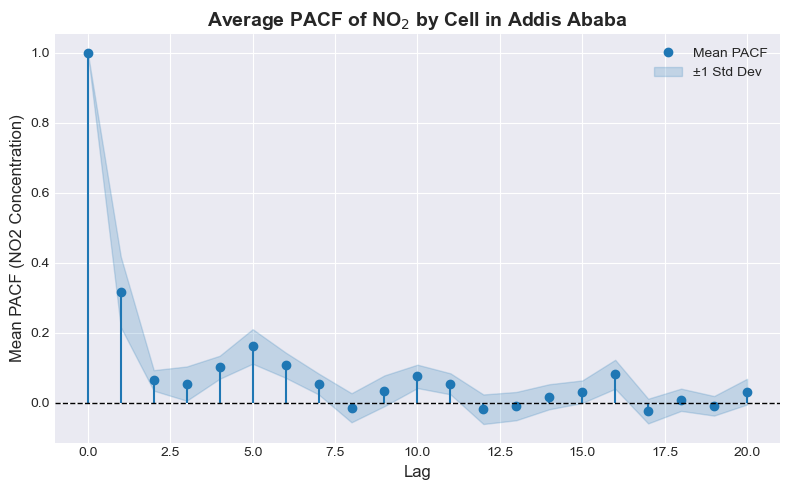

Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


In [ ]:
from analysis import compute_pacf
from visualization import plot_mean_pacf

addis_mesh_path = DATA_PATH / "addis-mesh-data"

addis_all_pacf = compute_pacf(addis_mesh_path, nlags=20, column_name='no2_mean')
plot_mean_pacf(addis_all_pacf, 
        output_path = DEMO_PATH,
        pacf_title  = "Average PACF of NO$_2$ by Cell in Addis Ababa", 
        ylabel_name = "NO2 Concentration")

# If no data, use the following command
# show_image(DEMO_PATH / "Average PACF of NO$_2$ by Cell in Addis Ababa.png")

**Iraq - Baghdad**

NO₂ PACF figure in Baghdad.

Calculating PACF for each geom_id: 100%|██████████| 6126/6126 [00:47<00:00, 130.30it/s]


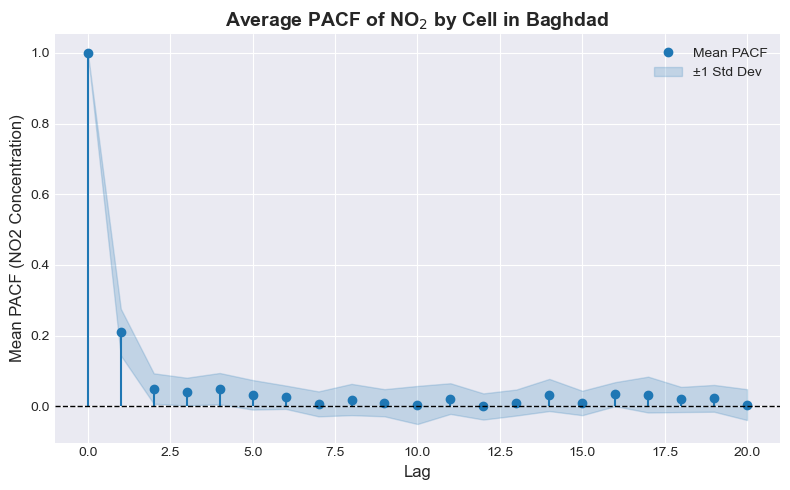

Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


In [ ]:
from analysis import compute_pacf
from visualization import plot_mean_pacf

baghdad_mesh_path = DATA_PATH / "baghdad-mesh-data"

baghdad_all_pacf = compute_pacf(baghdad_mesh_path, nlags=20, column_name='no2_mean')
plot_mean_pacf(baghdad_all_pacf, 
        output_path = DEMO_PATH,
        pacf_title  = "Average PACF of NO$_2$ by Cell in Baghdad", 
        ylabel_name = "NO2 Concentration")

# If no data, use the following command
# show_image(DEMO_PATH / "Average PACF of NO$_2$ by Cell in Baghdad.png")

#### 2) Spatial Auto-correlation

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date, load_gpkgs
from analysis import average_mesh_over_time, compute_plot_local_moran

addis_folder = DATA_PATH / 'addis-mesh-data'
baghdad_folder = DATA_PATH / 'baghdad-mesh-data'

dates_23 = specific_date('2023-01-01', '2023-12-31')
dates_24 = specific_date('2024-01-01', '2024-12-31')

**Addis Ababa**

Reading GPKG files:   0%|          | 0/365 [00:00<?, ?it/s]

Reading GPKG files: 100%|██████████| 366/366 [00:10<00:00, 35.08it/s]


Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data
Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


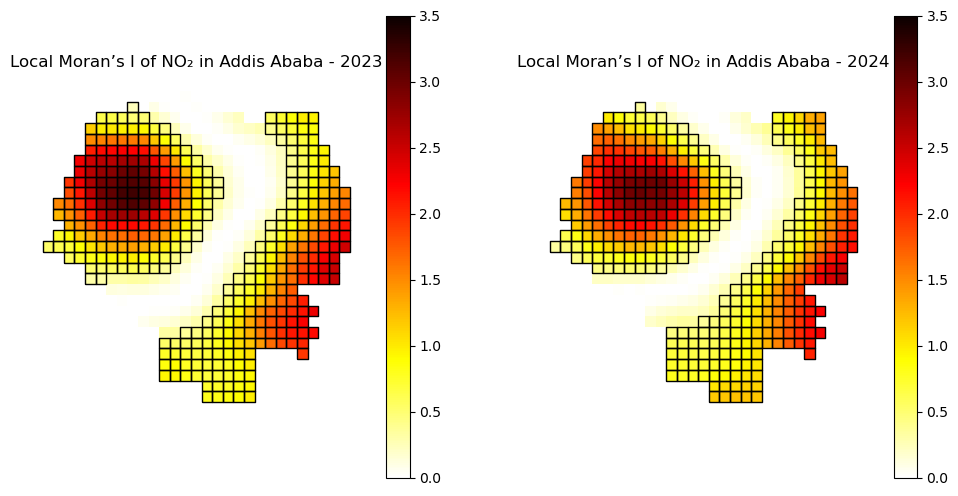

In [ ]:
addis_23_gdfs = load_gpkgs(addis_folder, dates=dates_23)
addis_24_gdfs = load_gpkgs(addis_folder, dates=dates_24)
addis_mean_23_mesh = average_mesh_over_time(addis_23_gdfs)
addis_mean_24_mesh = average_mesh_over_time(addis_24_gdfs)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
compute_plot_local_moran(gdf=addis_mean_23_mesh, ax=ax[0], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Addis Ababa - 2023", show_plot = False, vmin=0, vmax=3.5)
compute_plot_local_moran(gdf=addis_mean_24_mesh, ax=ax[1], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Addis Ababa - 2024", show_plot = False, vmin=0, vmax=3.5)

**Baghdad**

Reading GPKG files: 100%|██████████| 366/366 [01:05<00:00,  5.55it/s]


Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data
Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


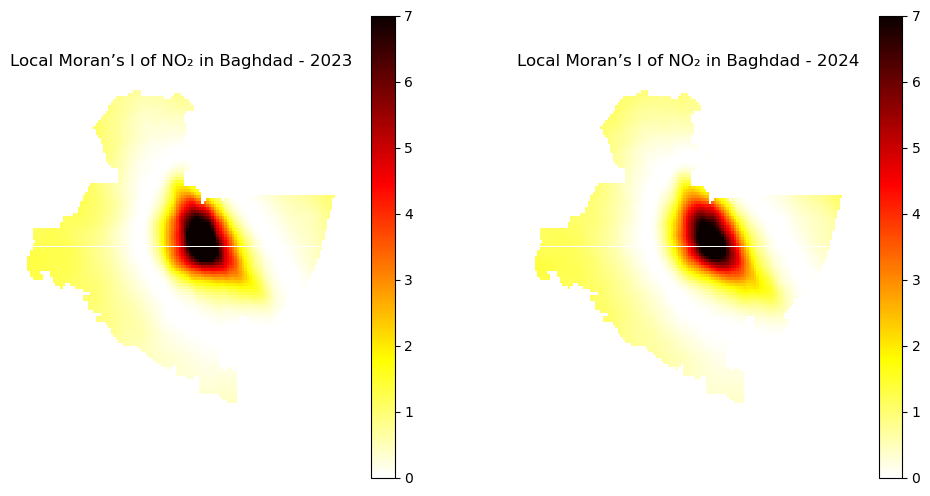

In [ ]:
baghdad_23_gdfs = load_gpkgs(baghdad_folder, dates=dates_23)
baghdad_24_gdfs = load_gpkgs(baghdad_folder, dates=dates_24)
baghdad_mean_23_mesh = average_mesh_over_time(baghdad_23_gdfs)
baghdad_mean_24_mesh = average_mesh_over_time(baghdad_24_gdfs)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
compute_plot_local_moran(gdf=baghdad_mean_23_mesh, ax=ax[0], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Baghdad - 2023", if_emphasize=False, show_plot = False, vmin=0, vmax=7)
compute_plot_local_moran(gdf=baghdad_mean_24_mesh, ax=ax[1], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Baghdad - 2024", if_emphasize=False, show_plot = False, vmin=0, vmax=7)

#### 3) Different Day Types Aggregation

In this section, NO2 concentration is aggregated based on different day type, according to different working scheme in different countries.

**Addis Ababa**

In temporal analysis, we grouped days considering working schema from Ethiopia, including **Workdays**, **Weekends**.

- Type i - Workdays: Mon-Fri
- Type ii - Weekends: Sat-Sun

**Baghdad**

In temporal analysis, we grouped days considering working schema from Iraq **Mon-Tue-Wed**, **Fri-Sat**, **Thu-Sun**.

- Type i - Working days: Mon-Tue-Wed
- Type ii - Extended working days: Thu-Sun     
- Type iii - Weekends: Fri-Sat

Day type is encoded using *str* type.


In [ ]:
import pandas as pd
from aggregation import compute_mean_mesh_by_daytype
# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

Helper Date Table:
        Date  Weekday Ethiopia_Workday_Type Iraq_Workday_Type
0 2023-01-01   Sunday              Weekends           Thu-Sun
1 2023-01-02   Monday              Workdays       Mon-Tue-Wed
2 2023-01-03  Tuesday              Workdays       Mon-Tue-Wed


**Ethiopia - Addis Ababa**

Calculate the average NO2 distribution in both workdays and weekends in Addis Ababa.

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
addis_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "addis_ababa_workdays_weekends_no2_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
addis_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "addis_ababa_workdays_weekends_no2_2024_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_24
)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\addis_ababa_workdays_weekends_no2_2024_mesh.gpkg


D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\aggregation.py:246: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stacked = pd.concat(frames, ignore_index=True)


Compare the results in different workday types.

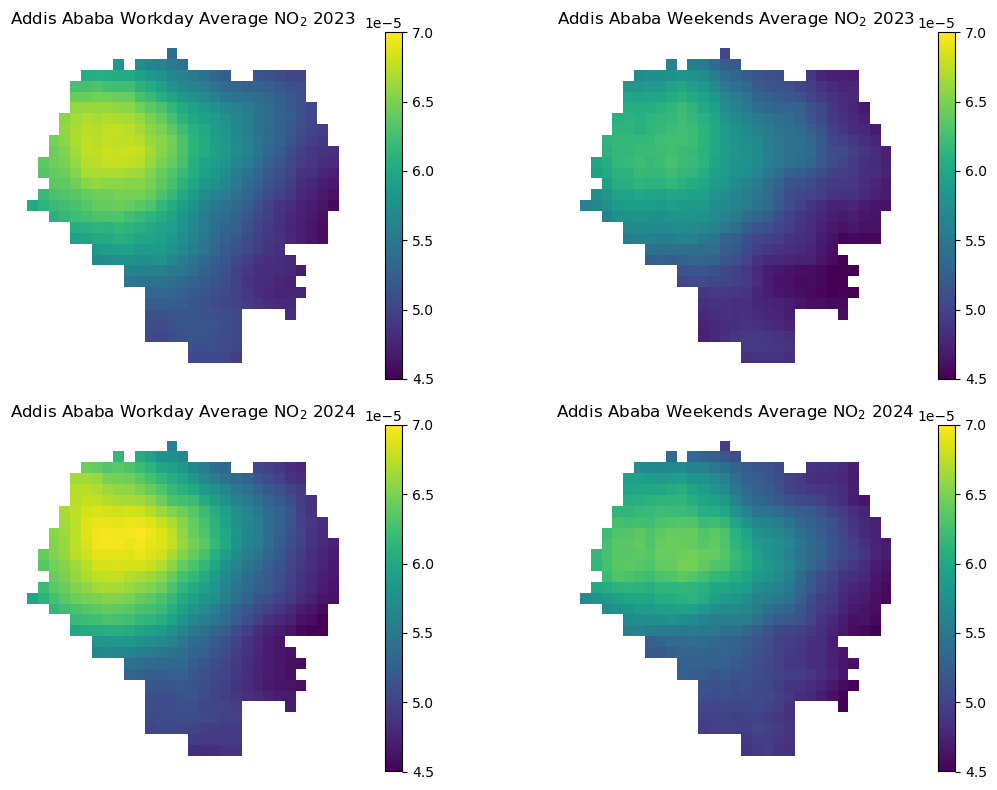

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

addis_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "addis_ababa_workdays_weekends_no2_2023_mesh.gpkg")
addis_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "addis_ababa_workdays_weekends_no2_2024_mesh.gpkg")
fig, axes = plt.subplots(2,2, figsize=(12, 8))

plot_mesh(addis_workday_2023_average, "Workdays_mean", title="Addis Ababa Workday Average NO$_2$ 2023", ax = axes[0,0], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plot_mesh(addis_workday_2023_average, "Weekends_mean", title="Addis Ababa Weekends Average NO$_2$ 2023", ax = axes[0,1], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plot_mesh(addis_workday_2024_average, "Workdays_mean", title="Addis Ababa Workday Average NO$_2$ 2024", ax = axes[1,0], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plot_mesh(addis_workday_2024_average, "Weekends_mean", title="Addis Ababa Weekends Average NO$_2$ 2024", ax = axes[1,1], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plt.tight_layout()
plt.show()

**Iraq - Baghdad**

Calculate the average NO2 distribution in different days, from Monday to Sunday in Baghdad.

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
baghdad_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "baghdad_workdays_weekends_no2_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
baghdad_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "baghdad_workdays_weekends_no2_2024_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_24
)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\baghdad_workdays_weekends_no2_2023_mesh.gpkg


D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\aggregation.py:246: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stacked = pd.concat(frames, ignore_index=True)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\baghdad_workdays_weekends_no2_2024_mesh.gpkg


Compare the results in different workday types, we have three in this Baghdad ('Mon-Tue-Wed', 'Fri-Sat' and 'Thu-Sun').

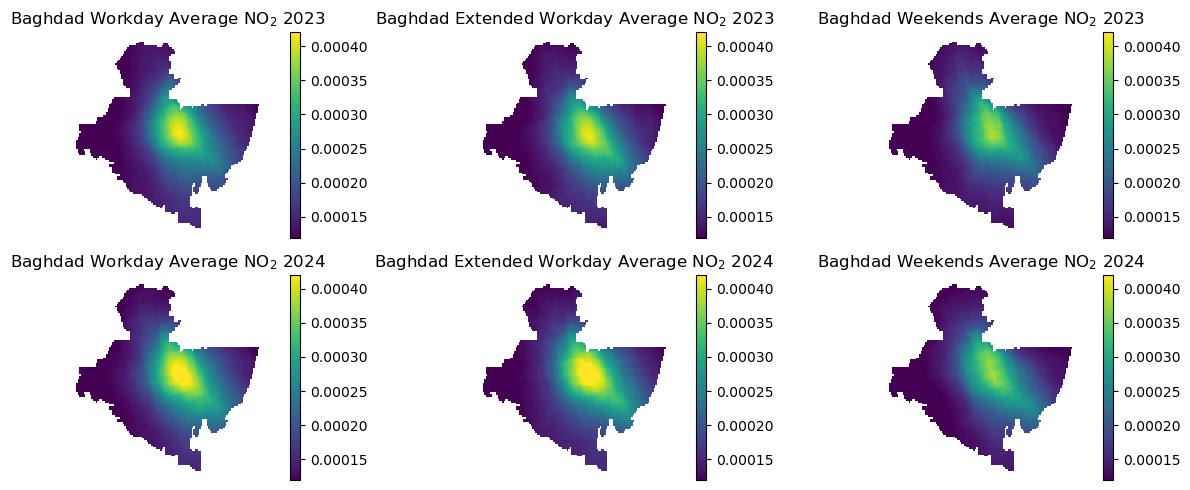

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

baghdad_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "baghdad_workdays_weekends_no2_2023_mesh.gpkg")
baghdad_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "baghdad_workdays_weekends_no2_2024_mesh.gpkg")
fig, axes = plt.subplots(2,3, figsize=(13, 5))

plot_mesh(baghdad_workday_2023_average, "Mon-Tue-Wed_mean", title="Baghdad Workday Average NO$_2$ 2023", ax = axes[0,0], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_2023_average, "Thu-Sun_mean", title="Baghdad Extended Workday Average NO$_2$ 2023", ax = axes[0,1], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_2023_average, "Fri-Sat_mean", title="Baghdad Weekends Average NO$_2$ 2023", ax = axes[0,2], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)

plot_mesh(baghdad_workday_2024_average, "Mon-Tue-Wed_mean", title="Baghdad Workday Average NO$_2$ 2024", ax = axes[1,0], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_2024_average, "Thu-Sun_mean", title="Baghdad Extended Workday Average NO$_2$ 2024", ax = axes[1,1], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_2024_average, "Fri-Sat_mean", title="Baghdad Weekends Average NO$_2$ 2024", ax = axes[1,2], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)

plt.tight_layout()
plt.show()

#### 4) Sub Administrative Area Analysis

**Addis Ababa**

In [ ]:
# Data paths and settings (relative paths)
data_folder = DATA_PATH / "addis-ababa-no2-mesh"
shapefile_path = DEMO_PATH / "addis-ababa-adm3.shp"
output_folder_2023 = DATA_PATH / "addis-ababa-zonal-time-series-plots/2023"
output_folder_2024 = DATA_PATH / "addis-ababa-zonal-time-series-plots/2024"
output_folder_2023.mkdir(exist_ok=True)
output_folder_2024.mkdir(exist_ok=True)

**2023**

/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_7256/2465498058.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(time_series_data)


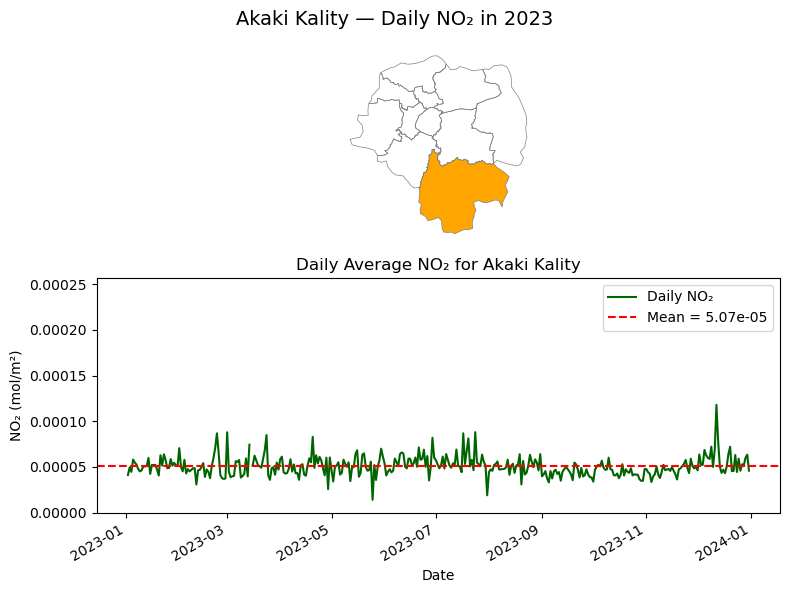

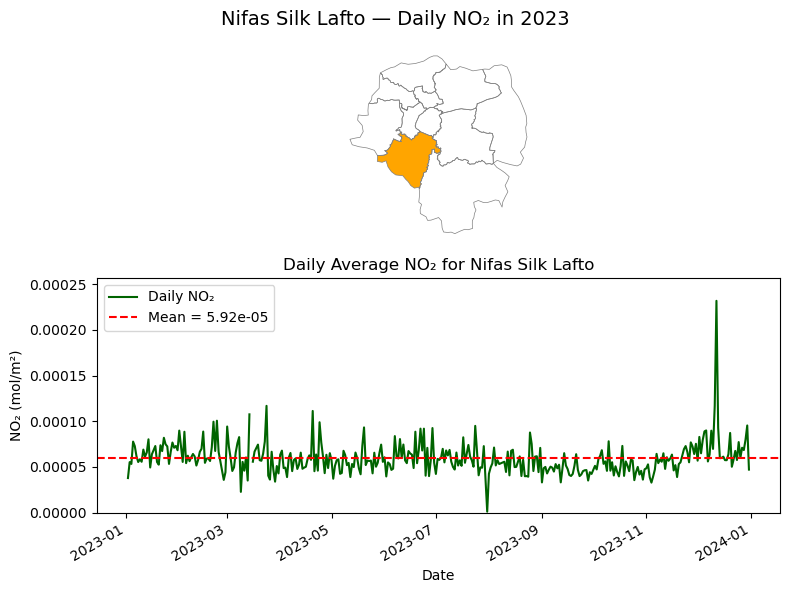

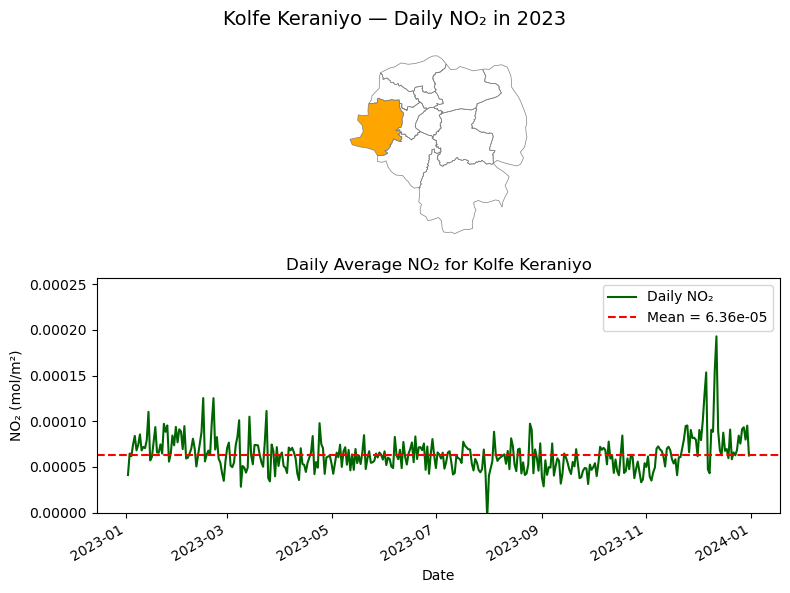

In [ ]:
# Load administrative boundary
adm3 = gpd.read_file(shapefile_path).to_crs(epsg=4326)
adm3 = adm3.reset_index(drop=True).reset_index().rename(columns={"index": "adm_id"})

# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("addis-ababa-2023"):
        continue

    date_str = f.split("addis-ababa-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(data_folder / f)
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot and save figures
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2023", fontsize=14)

    # Top subplot: map with the selected ADM3 zone highlighted
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series with mean line
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Show only the first 3 plots
    if i < 3:
        plt.show()

    # Save all plots
    out_path = output_folder_2023 / f"{adm_name.replace(' ', '_')}.png"
    fig.savefig(out_path, dpi=100)
    plt.close()


**2024**

/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_7256/364043073.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(time_series_data)


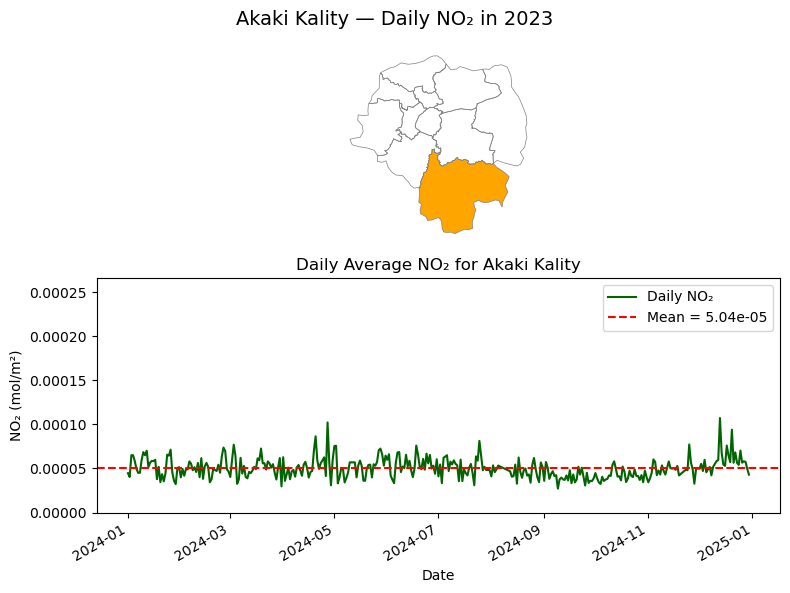

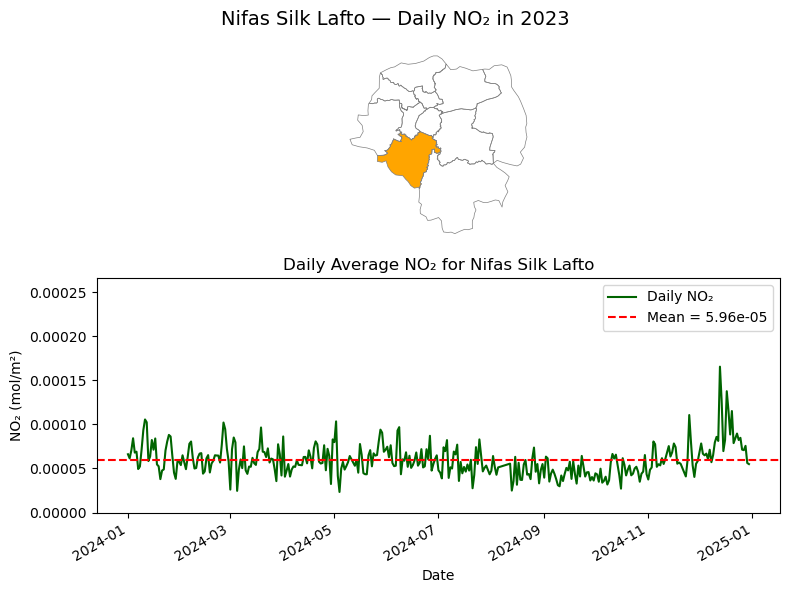

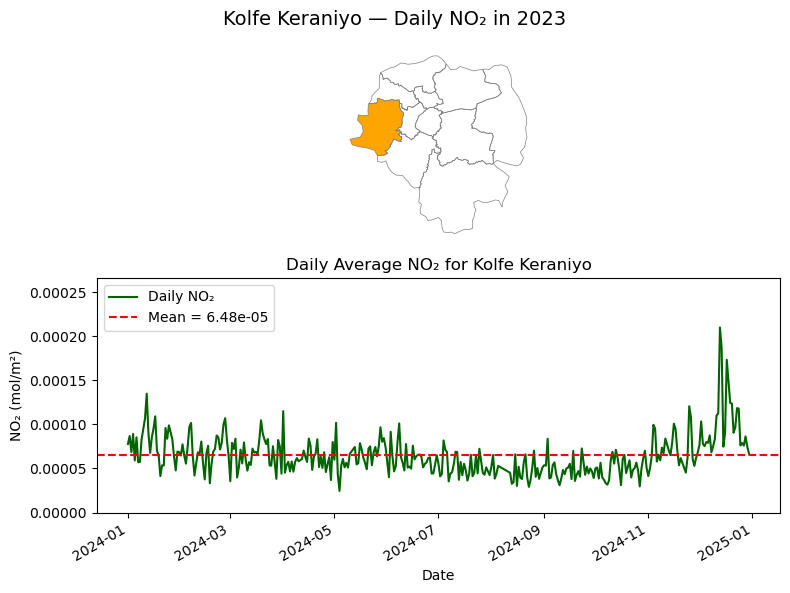

In [ ]:
# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("addis-ababa-2024"):
        continue

    date_str = f.split("addis-ababa-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(data_folder / f)
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot and save figures
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2023", fontsize=14)

    # Top subplot: map with the selected ADM3 zone highlighted
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series with mean line
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Show only the first 3 plots
    if i < 3:
        plt.show()

    # Save all plots
    out_path = output_folder_2024 / f"{adm_name.replace(' ', '_')}.png"
    fig.savefig(out_path, dpi=100)
    plt.close()


**Iraq - Baghdad**

In [ ]:
# Data paths and settings (relative paths)
data_folder = DATA_PATH / "baghdad-no2-mesh"
shapefile_path = DEMO_PATH / "baghdad-adm3.shp"
output_folder_2023 = DATA_PATH / "baghdad-zonal-time-series-plots/2023"
output_folder_2024 = DATA_PATH / "baghdad-zonal-time-series-plots/2024"
output_folder_2023.mkdir(exist_ok=True)
output_folder_2024.mkdir(exist_ok=True)


**2023**

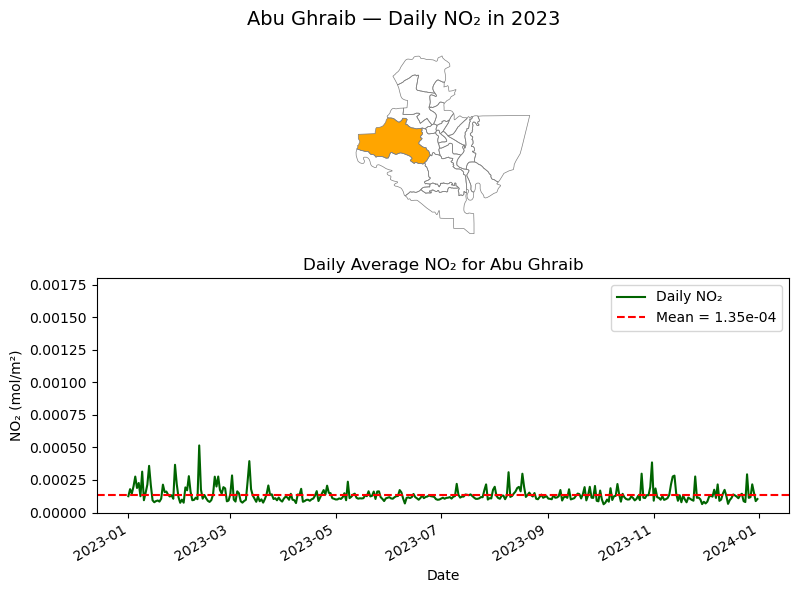

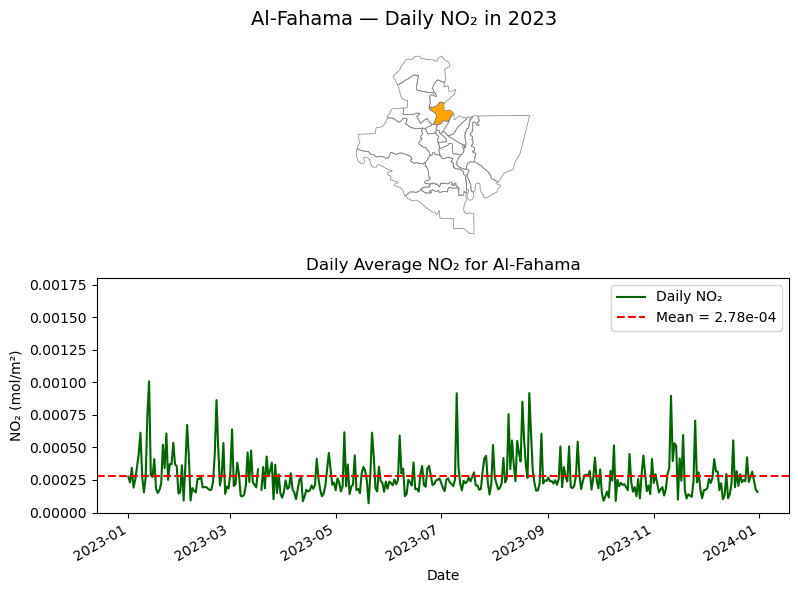

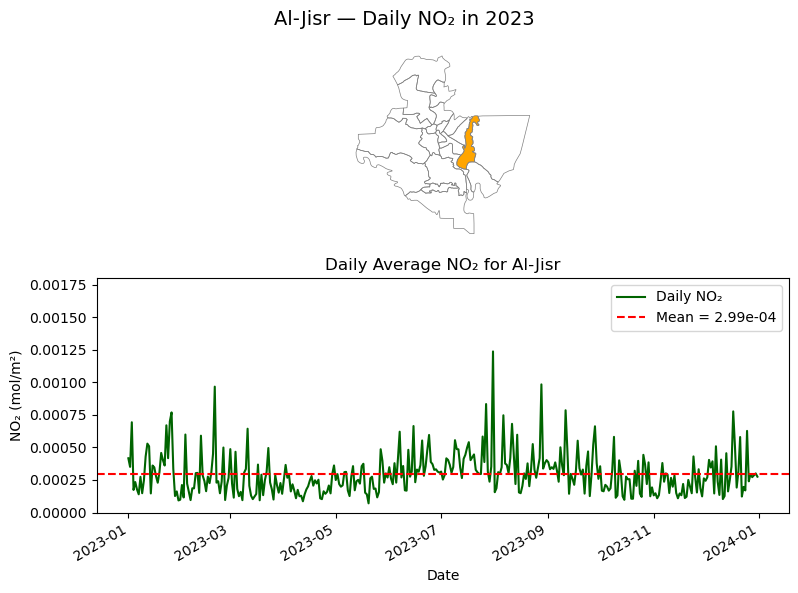

In [ ]:
# Load administrative boundary
adm3 = gpd.read_file(shapefile_path).to_crs(epsg=4326)
adm3 = adm3.reset_index(drop=True).reset_index().rename(columns={"index": "adm_id"})

# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("baghdad-2023"):
        continue

    date_str = f.split("baghdad-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(data_folder / f)
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot and save figures
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2023", fontsize=14)

    # Top subplot: map with the selected ADM3 zone highlighted
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series with mean line
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Show only the first 3 plots
    if i < 3:
        plt.show()

    # Save all plots
    out_path = output_folder_2023 / f"{adm_name.replace(' ', '_')}.png"
    fig.savefig(out_path, dpi=100)
    plt.close()


**2024**

/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_7256/2384218097.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(time_series_data)


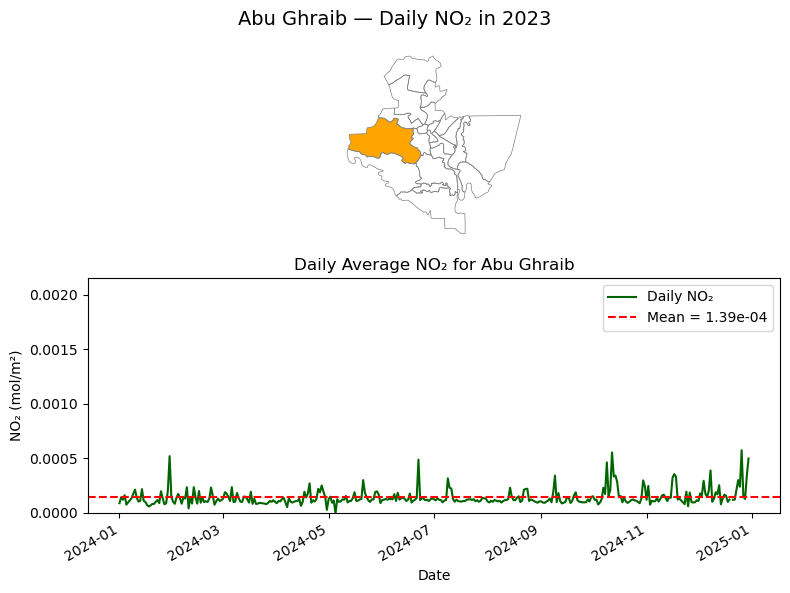

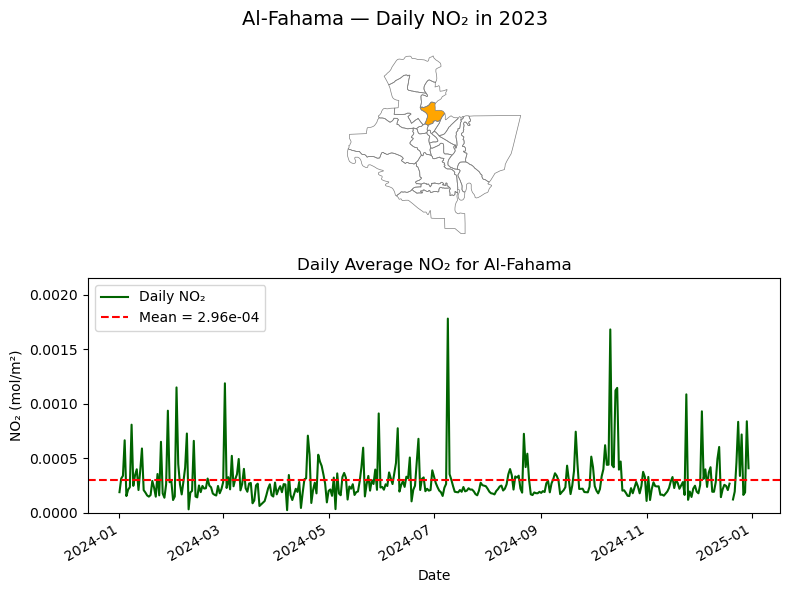

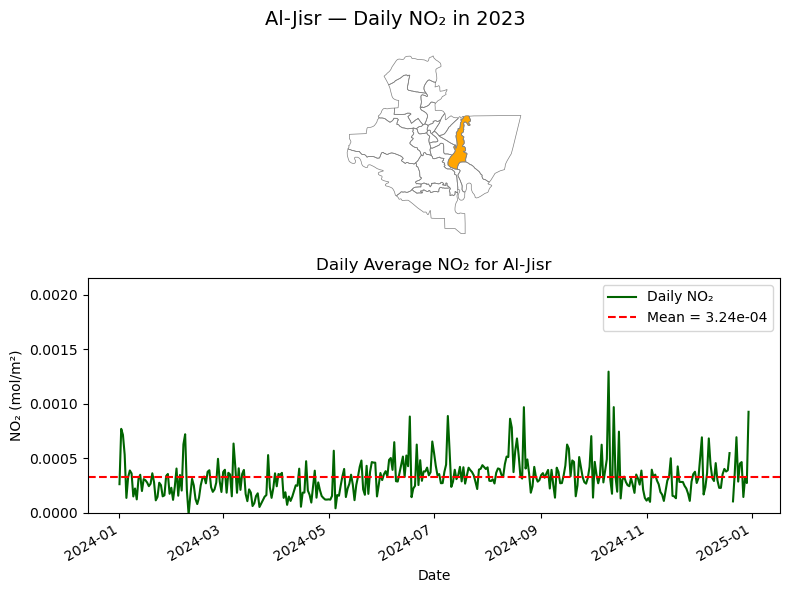

In [ ]:
# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("baghdad-2024"):
        continue

    date_str = f.split("baghdad-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(data_folder / f)
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot and save figures
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2023", fontsize=14)

    # Top subplot: map with the selected ADM3 zone highlighted
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series with mean line
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Show only the first 3 plots
    if i < 3:
        plt.show()

    # Save all plots
    out_path = output_folder_2024 / f"{adm_name.replace(' ', '_')}.png"
    fig.savefig(out_path, dpi=100)
    plt.close()


### 1.2 Population Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read files with relative paths
addis_2023 = pd.read_parquet(DEMO_PATH / 'addis_ababa_hex_2023_pop.parquet')
addis_2024 = pd.read_parquet(DEMO_PATH / 'addis_ababa_hex_2024_pop.parquet')
baghdad_2023 = pd.read_parquet(DEMO_PATH / 'baghdad_hex_2023_pop.parquet')
baghdad_2024 = pd.read_parquet(DEMO_PATH / 'baghdad_hex_2024_pop.parquet')
print(addis_2023.columns)

Index(['geom_id', 'geometry', 'pop_sum_m'], dtype='object')


#### 1) Population Distribution

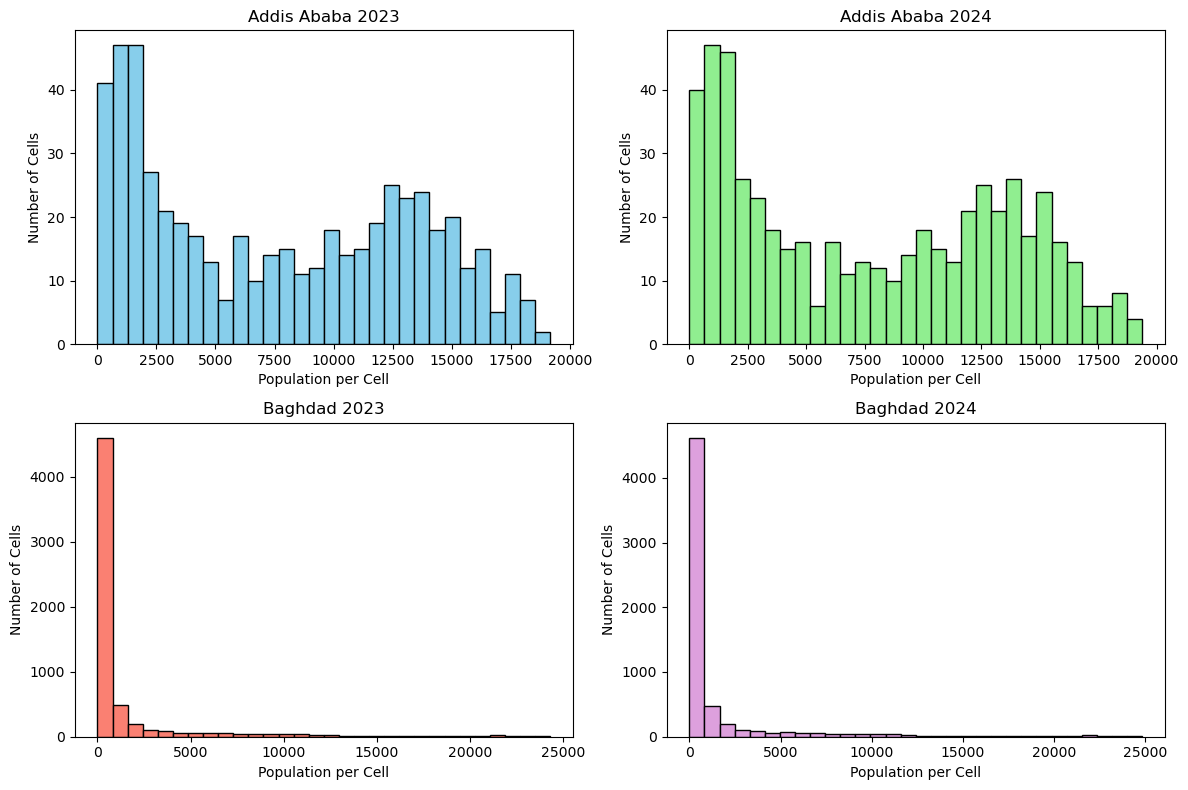

In [ ]:
# Set the name of the column that contains population values
pop_column = 'pop_sum_m'

# Create a 2x2 grid of subplots for plotting boxplots of each dataset
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Addis 2023
axes[0, 0].hist(addis_2023[pop_column], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Addis Ababa 2023')
axes[0, 0].set_xlabel('Population per Cell')
axes[0, 0].set_ylabel('Number of Cells')

# Addis 2024
axes[0, 1].hist(addis_2024[pop_column], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Addis Ababa 2024')
axes[0, 1].set_xlabel('Population per Cell')
axes[0, 1].set_ylabel('Number of Cells')

# Baghdad 2023
axes[1, 0].hist(baghdad_2023[pop_column], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('Baghdad 2023')
axes[1, 0].set_xlabel('Population per Cell')
axes[1, 0].set_ylabel('Number of Cells')

# Baghdad 2024
axes[1, 1].hist(baghdad_2024[pop_column], bins=30, color='plum', edgecolor='black')
axes[1, 1].set_title('Baghdad 2024')
axes[1, 1].set_xlabel('Population per Cell')
axes[1, 1].set_ylabel('Number of Cells')

plt.tight_layout()
plt.show()


#### 2) Population Boxplot

/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_5527/2838755482.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


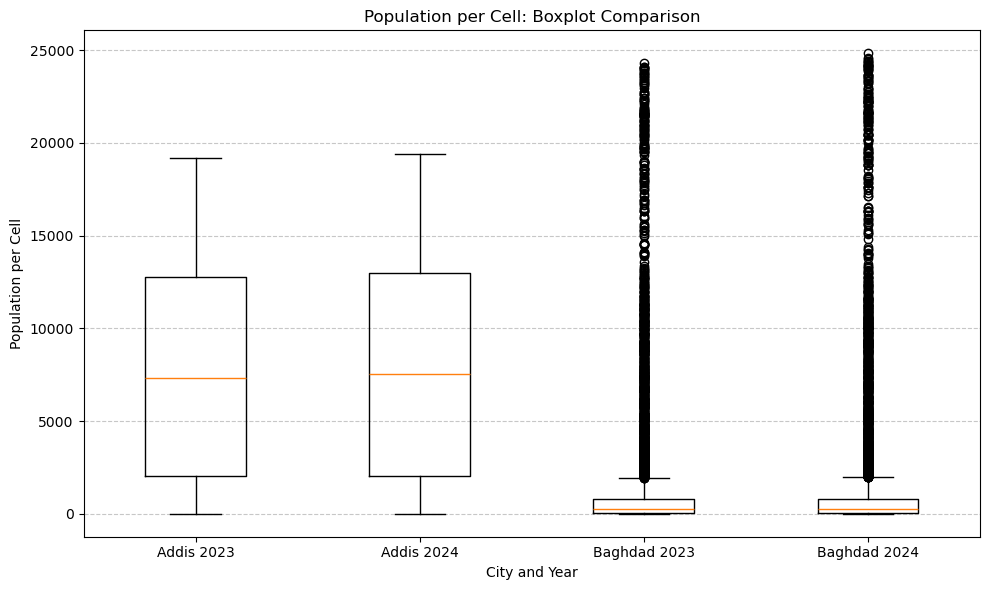

In [ ]:
# Prepare data for boxplot
data = [
    addis_2023[pop_column],
    addis_2024[pop_column],
    baghdad_2023[pop_column],
    baghdad_2024[pop_column]
]

labels = ['Addis 2023', 'Addis 2024', 'Baghdad 2023', 'Baghdad 2024']

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showfliers=True)

# Add title and labels
plt.title('Population per Cell: Boxplot Comparison')
plt.ylabel('Population per Cell')
plt.xlabel('City and Year')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 1.3 Traffic Congestion Index

#### 1) Different Day Types Aggregation

In this section, NO2 concentration is aggregated based on different day type, according to different working scheme in different countries.

**Addis Ababa**

In temporal analysis, we grouped days considering working schema from Ethiopia, including **Workdays**, **Weekends**.

- Type i - Workdays: Mon-Fri
- Type ii - Weekends: Sat-Sun

**Baghdad**

In temporal analysis, we grouped days considering working schema from Iraq **Mon-Tue-Wed**, **Fri-Sat**, **Thu-Sun**.

- Type i - Working days: Mon-Tue-Wed
- Type ii - Extended working days: Thu-Sun     
- Type iii - Weekends: Fri-Sat

Day type is encoded using *str* type.


In [ ]:
import pandas as pd
from aggregation import compute_mean_mesh_by_daytype
# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

Helper Date Table:
        Date  Weekday Ethiopia_Workday_Type Iraq_Workday_Type
0 2023-01-01   Sunday              Weekends           Thu-Sun
1 2023-01-02   Monday              Workdays       Mon-Tue-Wed
2 2023-01-03  Tuesday              Workdays       Mon-Tue-Wed


**Iraq - Baghdad**

Calculate the average TCI distribution in different days, from Monday to Sunday in Baghdad.

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_2324 = specific_date('2023-01-01', '2024-12-31')
baghdad_workday_2324_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "TCI",
    output_name = "baghdad_workdays_weekends_TCI_2324_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_2324
)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\baghdad_workdays_weekends_TCI_2324_mesh.gpkg


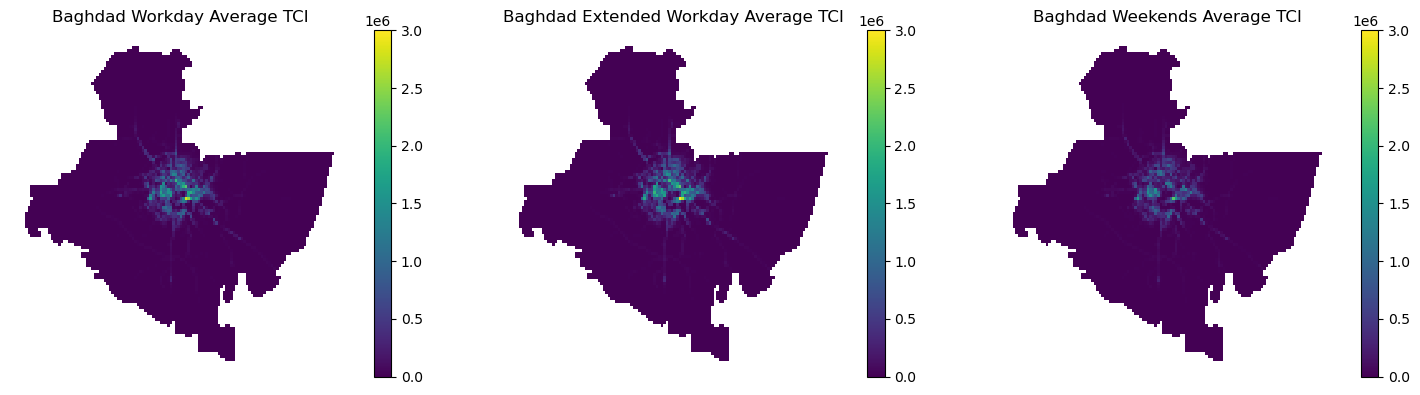

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

baghdad_tci_2324_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "baghdad_workdays_weekends_TCI_2324_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_mesh(baghdad_tci_2324_average, "Mon-Tue-Wed_mean", title="Baghdad Workday Average TCI", ax = axes[0], show_edges=False, show=False, vmin=0, vmax=3e6)
plot_mesh(baghdad_tci_2324_average, "Thu-Sun_mean", title="Baghdad Extended Workday Average TCI", ax = axes[1], show_edges=False, show=False, vmin=0, vmax=3e6)
plot_mesh(baghdad_tci_2324_average, "Fri-Sat_mean", title="Baghdad Weekends Average TCI", ax = axes[2], show_edges=False, show=False, vmin=0, vmax=3e6)

plt.tight_layout()
plt.show()

#### 2) Yearly Average


In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
baghdad_workday_23_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "TCI",
    output_name = "baghdad_workdays_weekends_TCI_23_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2023-01-01', '2024-12-31')
baghdad_workday_24_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "TCI",
    output_name = "baghdad_workdays_weekends_TCI_24_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_24
)

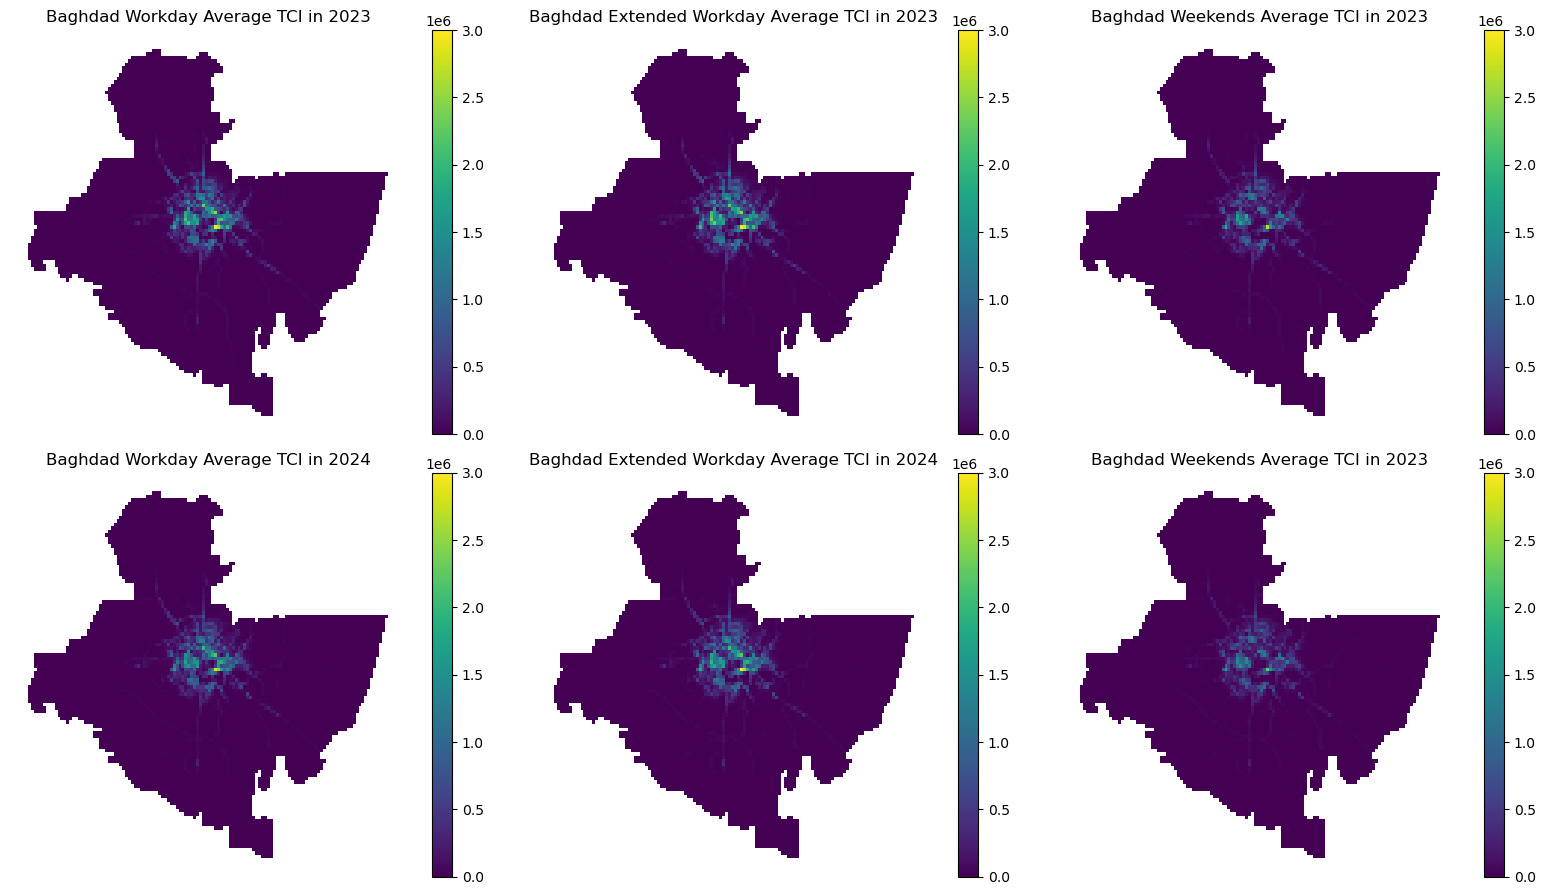

In [13]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

baghdad_tci_23_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "baghdad_workdays_weekends_TCI_23_mesh.gpkg")
baghdad_tci_24_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "baghdad_workdays_weekends_TCI_24_mesh.gpkg")
fig, axes = plt.subplots(2,3, figsize=(16, 9))

plot_mesh(baghdad_tci_23_average, "Mon-Tue-Wed_mean",   title="Baghdad Workday Average TCI in 2023", ax=axes[0,0], show_edges=False, show=False, vmin=0, vmax=3e6)
plot_mesh(baghdad_tci_24_average, "Mon-Tue-Wed_mean",   title="Baghdad Workday Average TCI in 2024", ax=axes[1,0], show_edges=False, show=False, vmin=0, vmax=3e6)

plot_mesh(baghdad_tci_23_average, "Thu-Sun_mean",       title="Baghdad Extended Workday Average TCI in 2023", ax=axes[0,1], show_edges=False, show=False, vmin=0, vmax=3e6)
plot_mesh(baghdad_tci_24_average, "Thu-Sun_mean",       title="Baghdad Extended Workday Average TCI in 2024", ax=axes[1,1], show_edges=False, show=False, vmin=0, vmax=3e6)

plot_mesh(baghdad_tci_23_average, "Fri-Sat_mean",       title="Baghdad Weekends Average TCI in 2023", ax= axes[0,2], show_edges=False, show=False, vmin=0, vmax=3e6)
plot_mesh(baghdad_tci_24_average, "Fri-Sat_mean",       title="Baghdad Weekends Average TCI in 2023", ax=axes[1,2], show_edges=False, show=False, vmin=0, vmax=3e6)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date, load_gpkgs
from analysis import average_mesh_over_time, compute_plot_local_moran

addis_folder = DATA_PATH / 'addis-mesh-data'
baghdad_folder = DATA_PATH / 'baghdad-mesh-data'

dates_23 = specific_date('2023-01-01', '2023-12-31')
dates_24 = specific_date('2024-01-01', '2024-12-31')

Reading GPKG files: 100%|██████████| 366/366 [01:05<00:00,  5.55it/s]


Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data
Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


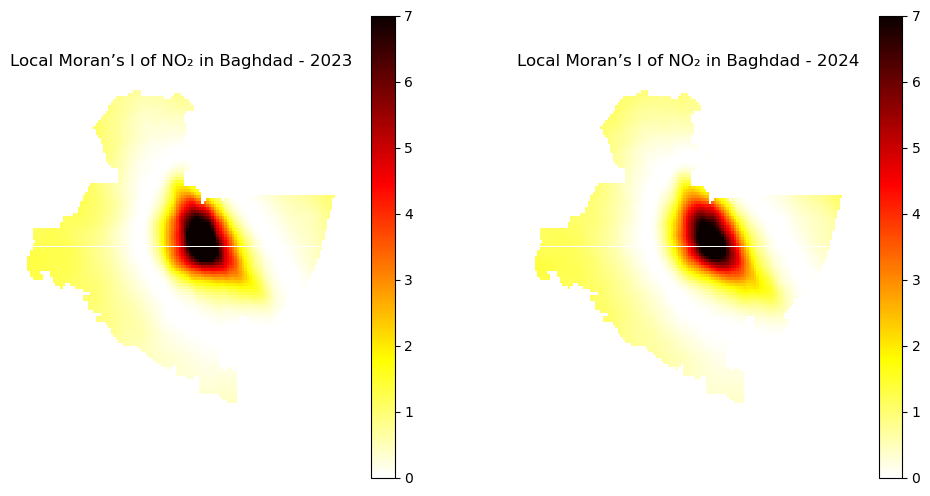

In [ ]:
baghdad_23_gdfs = load_gpkgs(baghdad_folder, dates=dates_23)
baghdad_24_gdfs = load_gpkgs(baghdad_folder, dates=dates_24)
baghdad_mean_23_mesh = average_mesh_over_time(baghdad_23_gdfs)
baghdad_mean_24_mesh = average_mesh_over_time(baghdad_24_gdfs)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
compute_plot_local_moran(gdf=baghdad_mean_23_mesh, ax=ax[0], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Baghdad - 2023", if_emphasize=False, show_plot = False, vmin=0, vmax=7)
compute_plot_local_moran(gdf=baghdad_mean_24_mesh, ax=ax[1], output_path=DEMO_PATH, feature_col='no2_mean', cmap='hot_r', plot_title="Local Moran’s I of NO₂ in Baghdad - 2024", if_emphasize=False, show_plot = False, vmin=0, vmax=7)

### 1.4 Land Surface Temperature

In [ ]:
import pandas as pd
from aggregation import compute_mean_mesh_by_daytype
# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

Helper Date Table:
        Date  Weekday Ethiopia_Workday_Type Iraq_Workday_Type
0 2023-01-01   Sunday              Weekends           Thu-Sun
1 2023-01-02   Monday              Workdays       Mon-Tue-Wed
2 2023-01-03  Tuesday              Workdays       Mon-Tue-Wed


#### Addis Ababa

Calculate the average temperature distribution in both workdays and weekends in Addis Ababa.

##### 1) **Satellite Aqua**

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
addis_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Aqua_addis_ababa_workdays_weekends_temp_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-ababa-LST-mesh-data-Aqua"/"addis-ababa-LST-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
addis_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Aqua_addis_ababa_workdays_weekends_temp_2024_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-ababa-LST-mesh-data-Aqua"/"addis-ababa-LST-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_24
)


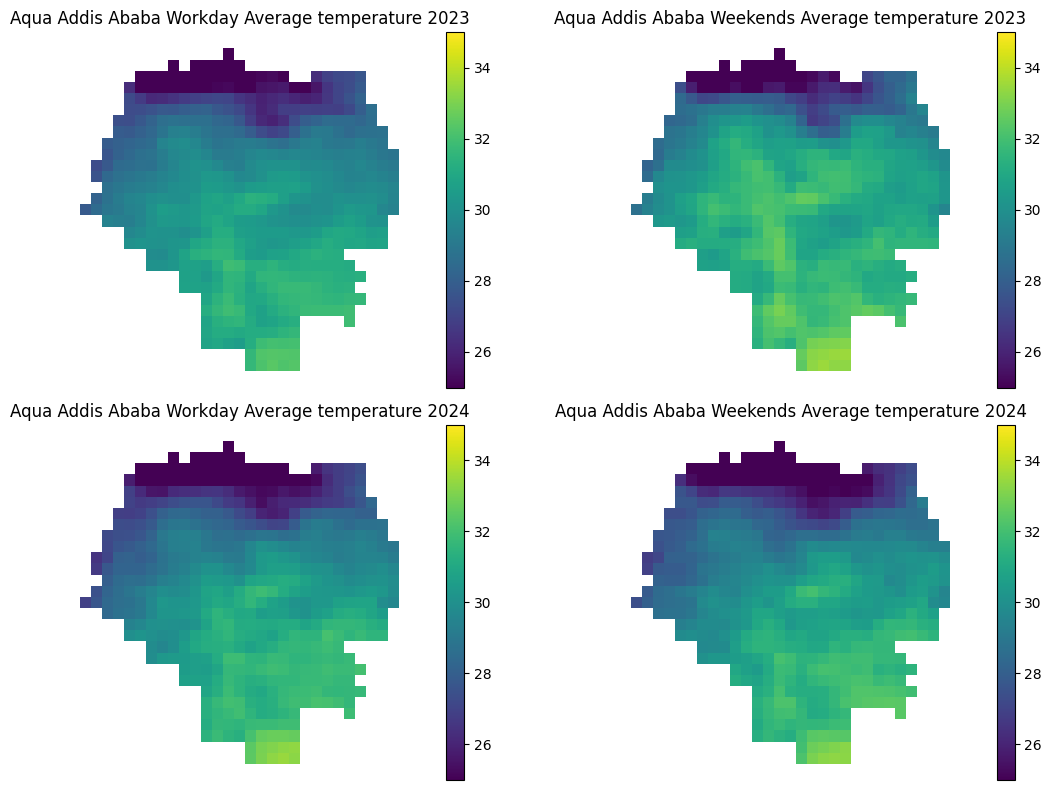

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

addis_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Aqua_addis_ababa_workdays_weekends_temp_2023_mesh.gpkg")
addis_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Aqua_addis_ababa_workdays_weekends_temp_2024_mesh.gpkg")
fig, axes = plt.subplots(2,2, figsize=(12, 8))

plot_mesh(addis_workday_2023_average, "Workdays_mean", title="Aqua Addis Ababa Workday Average temperature 2023", ax = axes[0,0], show_edges=False, show=False, vmin=25, vmax=35)
plot_mesh(addis_workday_2023_average, "Weekends_mean", title="Aqua Addis Ababa Weekends Average temperature 2023", ax = axes[0,1], show_edges=False, show=False, vmin=25, vmax=35)
plot_mesh(addis_workday_2024_average, "Workdays_mean", title="Aqua Addis Ababa Workday Average temperature 2024", ax = axes[1,0], show_edges=False, show=False,vmin=25, vmax=35)
plot_mesh(addis_workday_2024_average, "Weekends_mean", title="Aqua Addis Ababa Weekends Average temperature 2024", ax = axes[1,1], show_edges=False, show=False, vmin=25, vmax=35)
plt.tight_layout()
plt.show()

##### 2) **Satellite Terra**

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
addis_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Terra_addis_ababa_workdays_weekends_temp_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-ababa-LST-mesh-data -Terra"/"addis-ababa-LST-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
addis_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Terra_addis_ababa_workdays_weekends_temp_2024_mesh.gpkg",
    meshes_path =DATA_PATH / "addis-ababa-LST-mesh-data -Terra"/"addis-ababa-LST-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_24
)


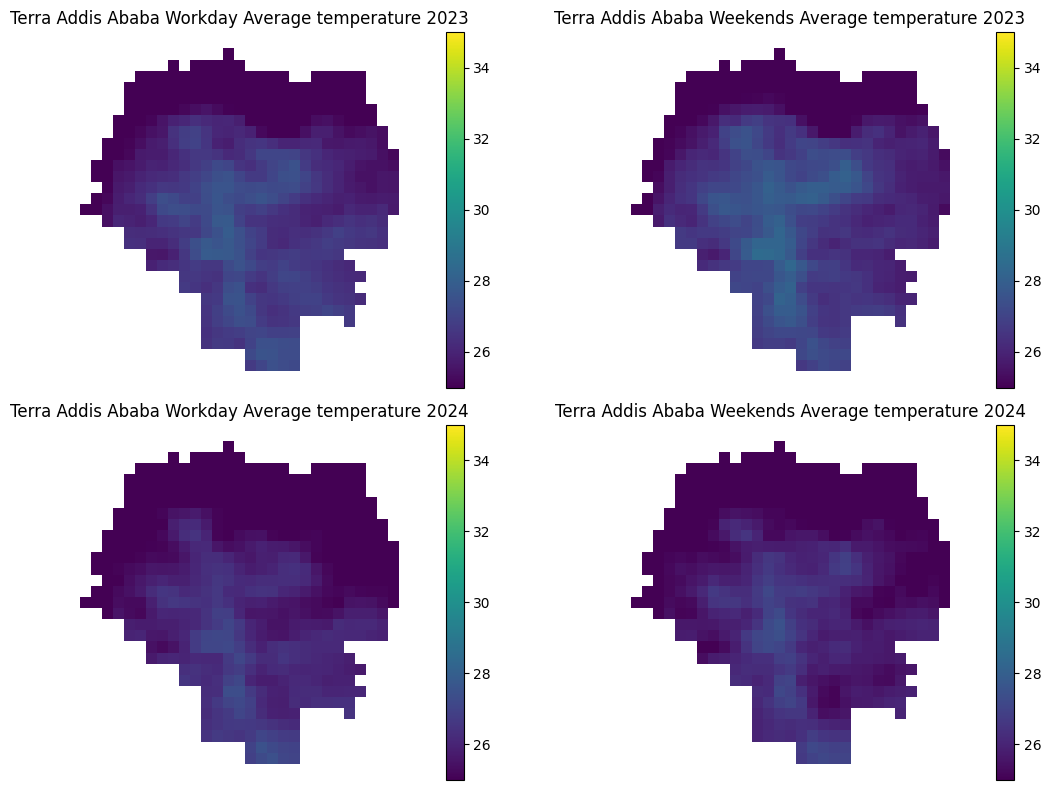

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

addis_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Terra_addis_ababa_workdays_weekends_temp_2023_mesh.gpkg")
addis_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Terra_addis_ababa_workdays_weekends_temp_2024_mesh.gpkg")
fig, axes = plt.subplots(2,2, figsize=(12, 8))

plot_mesh(addis_workday_2023_average, "Workdays_mean", title="Terra Addis Ababa Workday Average temperature 2023", ax = axes[0,0], show_edges=False, show=False, vmin=25, vmax=35)
plot_mesh(addis_workday_2023_average, "Weekends_mean", title="Terra Addis Ababa Weekends Average temperature 2023", ax = axes[0,1], show_edges=False, show=False, vmin=25, vmax=35)
plot_mesh(addis_workday_2024_average, "Workdays_mean", title="Terra Addis Ababa Workday Average temperature 2024", ax = axes[1,0], show_edges=False, show=False,vmin=25, vmax=35)
plot_mesh(addis_workday_2024_average, "Weekends_mean", title="Terra Addis Ababa Weekends Average temperature 2024", ax = axes[1,1], show_edges=False, show=False, vmin=25, vmax=35)
plt.tight_layout()
plt.show()

#### Baghdad

Calculate the average temperature distribution in in different days, from Monday to Sunday in Baghdad.

##### 1) **Satellite Aqua**

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
baghdad_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Aqua_baghdad_workdays_weekends_temp_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-LST-mesh-data-Aqua"/"baghdad-LST-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
baghdad_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "LST_day_mean",
    output_name = "Aqua_baghdad_workdays_weekends_temp_2024_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-LST-mesh-data-Aqua"/"baghdad-LST-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_24
)


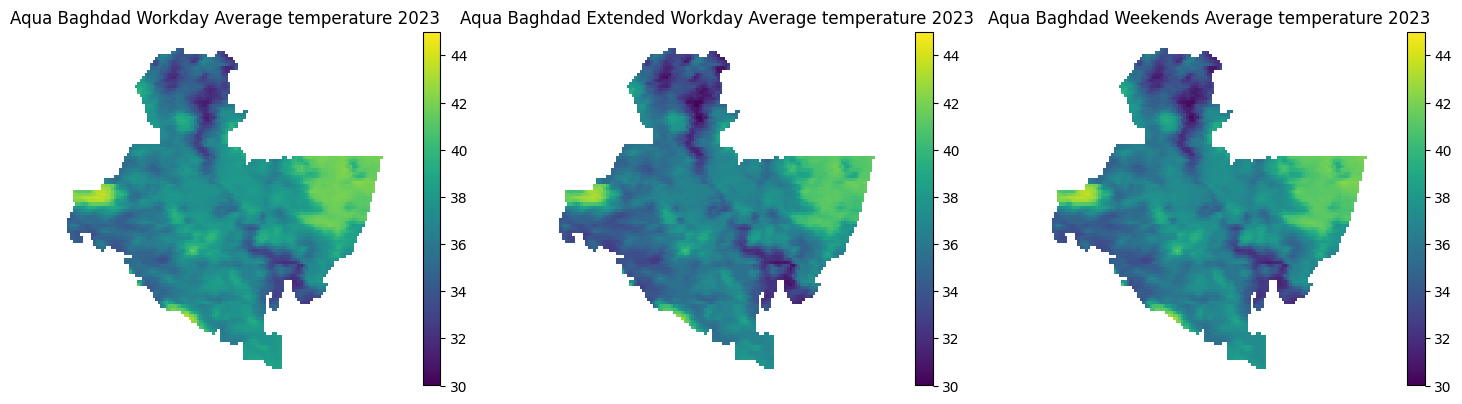

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

baghdad_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Aqua_baghdad_workdays_weekends_temp_2023_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_mesh(baghdad_workday_2023_average, "Mon-Tue-Wed_mean", title="Aqua Baghdad Workday Average temperature 2023", ax = axes[0], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2023_average, "Thu-Sun_mean", title="Aqua Baghdad Extended Workday Average temperature 2023", ax = axes[1], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2023_average, "Fri-Sat_mean", title="Aqua Baghdad Weekends Average temperature 2023", ax = axes[2], show_edges=False, show=False, vmin=30, vmax=45)

plt.tight_layout()
plt.show()

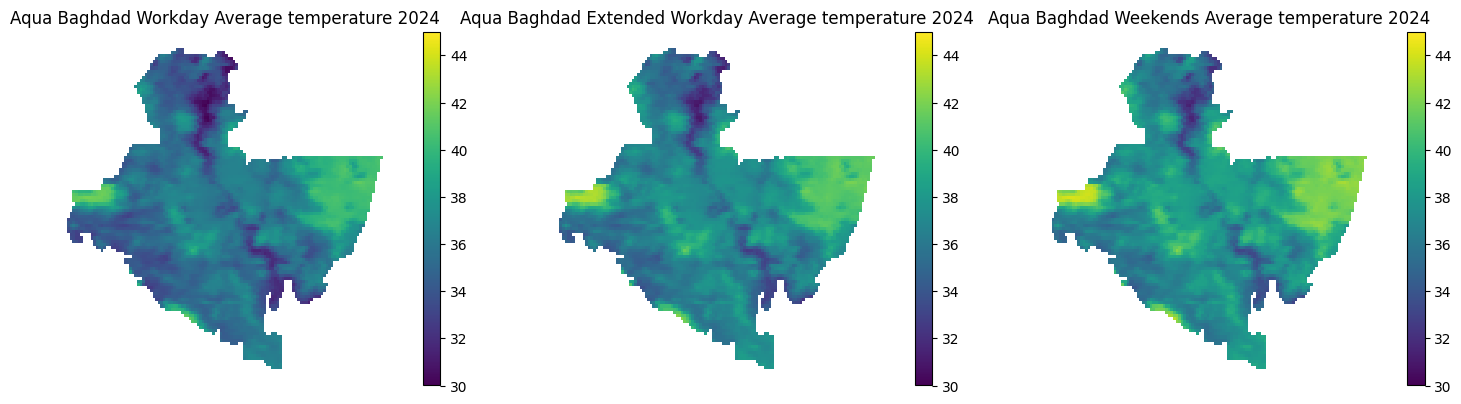

In [ ]:
baghdad_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Aqua_baghdad_workdays_weekends_temp_2024_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_mesh(baghdad_workday_2024_average, "Mon-Tue-Wed_mean", title="Aqua Baghdad Workday Average temperature 2024", ax = axes[0], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2024_average, "Thu-Sun_mean", title="Aqua Baghdad Extended Workday Average temperature 2024", ax = axes[1], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2024_average, "Fri-Sat_mean", title="Aqua Baghdad Weekends Average temperature 2024", ax = axes[2], show_edges=False, show=False, vmin=30, vmax=45)

plt.tight_layout()
plt.show()

##### 2) **Satellite Terra**

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mean_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
baghdad_workday_2023_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "temp_mean",
    output_name = "Terra_baghdad_workdays_weekends_temp_2023_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data-Terra"/"baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
baghdad_workday_2024_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "temp_mean",
    output_name = "Terra_baghdad_workdays_weekends_temp_2024_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data-Terra"/"baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_24


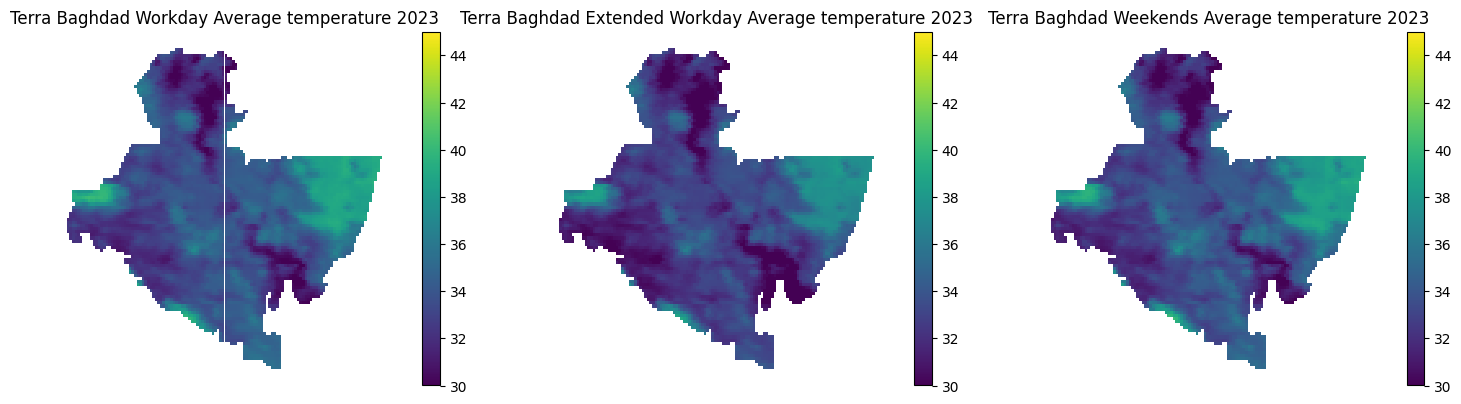

In [ ]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

baghdad_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Terra_baghdad_workdays_weekends_temp_2023_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_mesh(baghdad_workday_2023_average, "Mon-Tue-Wed_mean", title="Terra Baghdad Workday Average temperature 2023", ax = axes[0], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2023_average, "Thu-Sun_mean", title="Terra Baghdad Extended Workday Average temperature 2023", ax = axes[1], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2023_average, "Fri-Sat_mean", title="Terra Baghdad Weekends Average temperature 2023", ax = axes[2], show_edges=False, show=False, vmin=30, vmax=45)

plt.tight_layout()
plt.show()

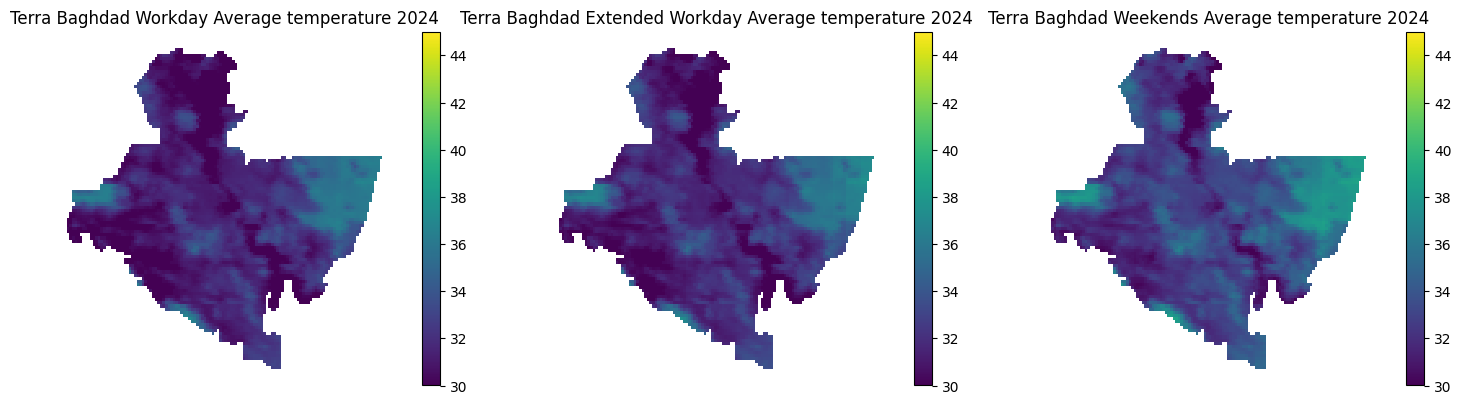

In [ ]:
baghdad_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Terra_baghdad_workdays_weekends_temp_2024_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_mesh(baghdad_workday_2024_average, "Mon-Tue-Wed_mean", title="Terra Baghdad Workday Average temperature 2024", ax = axes[0], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2024_average, "Thu-Sun_mean", title="Terra Baghdad Extended Workday Average temperature 2024", ax = axes[1], show_edges=False, show=False, vmin=30, vmax=45)
plot_mesh(baghdad_workday_2024_average, "Fri-Sat_mean", title="Terra Baghdad Weekends Average temperature 2024", ax = axes[2], show_edges=False, show=False, vmin=30, vmax=45)

plt.tight_layout()
plt.show()

### 1.5 Cloud Cover Category

#### 1) Different Day Types Aggregation


In [ ]:
import pandas as pd
from aggregation import compute_mean_mesh_by_daytype
# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

Helper Date Table:
        Date  Weekday Ethiopia_Workday_Type Iraq_Workday_Type
0 2023-01-01   Sunday              Weekends           Thu-Sun
1 2023-01-02   Monday              Workdays       Mon-Tue-Wed
2 2023-01-03  Tuesday              Workdays       Mon-Tue-Wed


**Ethiopia-Addis Ababa**

Calculate the mode cloud cover distribution in both workdays and weekends in Addis Ababa.

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mode_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
addis_workday_2023_average=compute_mode_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "cloud_category",
    output_name = "Addis_workdays_weekends_cloud_2023_mesh.gpkg",
    meshes_path = DATA_PATH /"addis-mesh-processed-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
addis_workday_2024_average=compute_mode_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "cloud_category",
    output_name = "Addis_workdays_weekends_cloud_2024_mesh.gpkg",
    meshes_path = DATA_PATH /"addis-mesh-processed-data",
    country = "Ethiopia",
    city = "addis-ababa",
    specify_date = True,
    selected_dates = dates_24
)

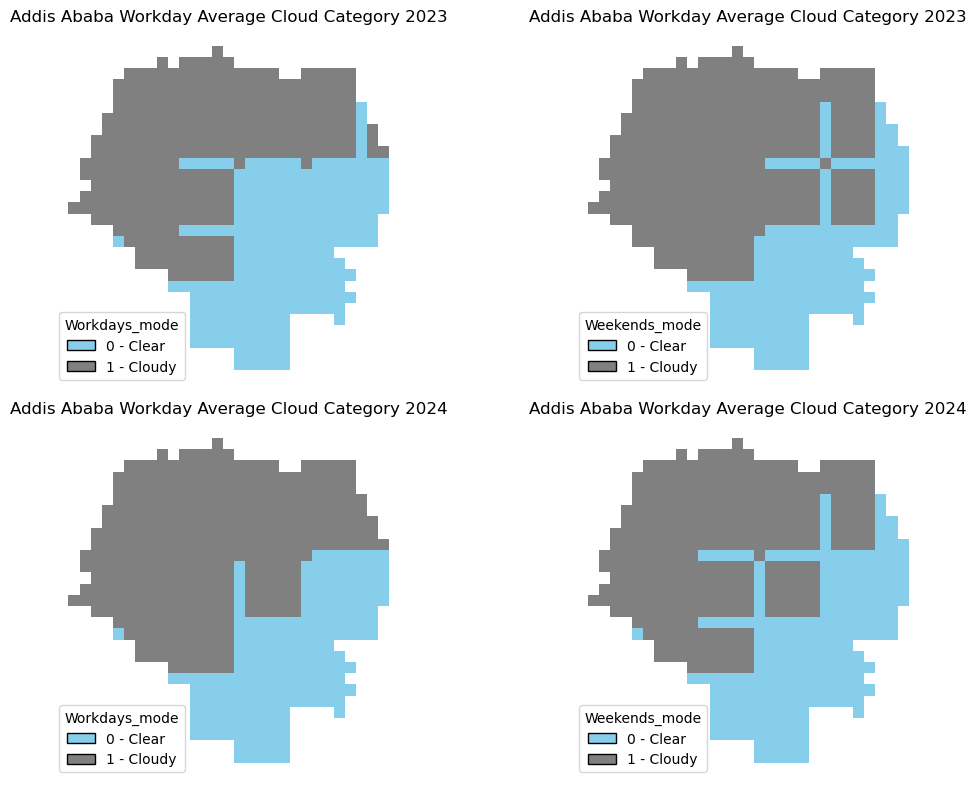

In [ ]:
from visualization import plot_cloud_category
import geopandas as gpd
from matplotlib import pyplot as plt

addis_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2023_mesh.gpkg")
addis_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2024_mesh.gpkg")
fig, axes = plt.subplots(2,2, figsize=(12, 8))


plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2023_mesh.gpkg",
    feature_col="Workdays_mode",
    title="Addis Ababa Workday Average Cloud Category 2023",
    show_edges=False,
    ax=axes[0, 0]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2023_mesh.gpkg",
    feature_col="Weekends_mode",
    title="Addis Ababa Workday Average Cloud Category 2023",
    show_edges=False,
    ax=axes[0, 1]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2024_mesh.gpkg",
    feature_col="Workdays_mode",
    title="Addis Ababa Workday Average Cloud Category 2024",
    show_edges=False,
    ax=axes[1, 0]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Addis_workdays_weekends_cloud_2024_mesh.gpkg",
    feature_col="Weekends_mode",
    title="Addis Ababa Workday Average Cloud Category 2024",
    show_edges=False,
    ax=axes[1, 1]
)

plt.tight_layout()
plt.show()

**Iraq-Baghdad**

Calculate the mode cloud cover distribution in different days, from Monday to Sunday in Baghdad.

In [ ]:
import matplotlib.pyplot as plt
from helpercollections import specific_date
from aggregation import compute_mode_mesh_by_daytype

dates_23 = specific_date('2023-01-01', '2023-12-31')
baghdad_workday_2023_average=compute_mode_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "cloud_category",
    output_name = "Baghdad_workdays_weekends_cloud_2023_mesh.gpkg",
    meshes_path = DATA_PATH /"baghdad-mesh-processed-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_23
)

dates_24 = specific_date('2024-01-01', '2024-12-31')
baghdad_workday_2024_average=compute_mode_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "cloud_category",
    output_name = "Baghdad_workdays_weekends_cloud_2024_mesh.gpkg",
    meshes_path = DATA_PATH /"baghdad-mesh-processed-data",
    country = "Iraq",
    city = "baghdad",
    specify_date = True,
    selected_dates = dates_24
)

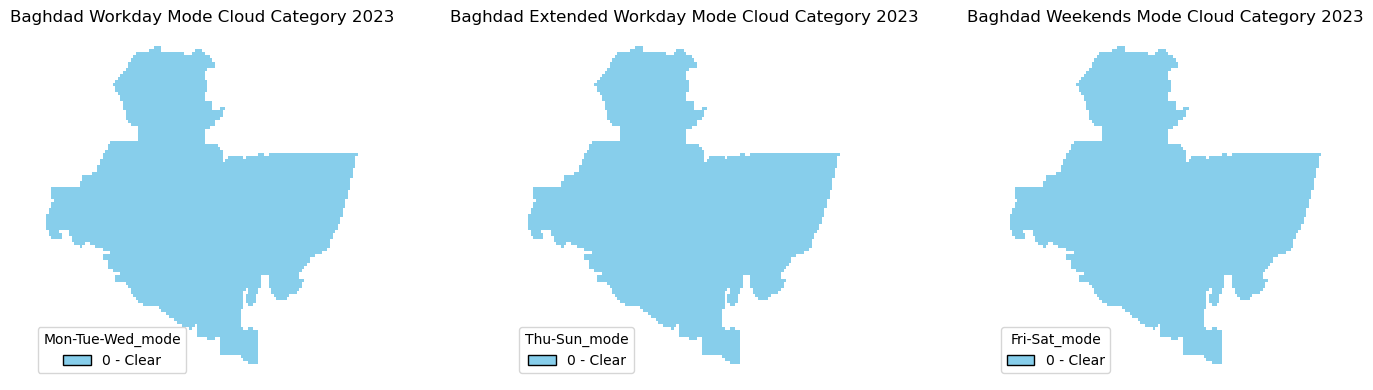

In [ ]:
from visualization import plot_cloud_category
import geopandas as gpd
from matplotlib import pyplot as plt

baghdad_workday_2023_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2023_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))


plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2023_mesh.gpkg",
    feature_col="Mon-Tue-Wed_mode",
    title="Baghdad Workday Mode Cloud Category 2023",
    show_edges=False,
    ax=axes[0]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2023_mesh.gpkg",
    feature_col="Thu-Sun_mode",
    title="Baghdad Extended Workday Mode Cloud Category 2023",
    show_edges=False,
    ax=axes[1]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2023_mesh.gpkg",
    feature_col="Fri-Sat_mode",
    title="Baghdad Weekends Mode Cloud Category 2023",
    show_edges=False,
    ax=axes[2]
)

plt.tight_layout()
plt.show()

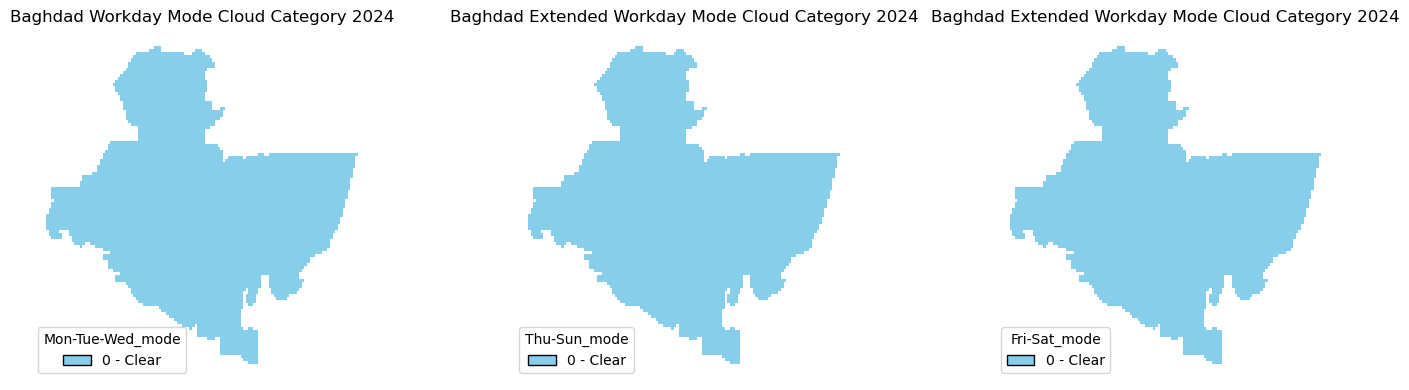

In [ ]:
baghdad_workday_2024_average = gpd.read_file(DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2024_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(15, 4))

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2024_mesh.gpkg",
    feature_col="Mon-Tue-Wed_mode",
    title="Baghdad Workday Mode Cloud Category 2024",
    show_edges=False,
    ax=axes[0]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2024_mesh.gpkg",
    feature_col="Thu-Sun_mode",
    title="Baghdad Extended Workday Mode Cloud Category 2024",
    show_edges=False,
    ax=axes[1]
)

plot_cloud_category(
    DATA_PATH / "exploratory-data-analysis" / "Baghdad_workdays_weekends_cloud_2024_mesh.gpkg",
    feature_col="Fri-Sat_mode",
    title="Baghdad Extended Workday Mode Cloud Category 2024",
    show_edges=False,
    ax=axes[2]
)

plt.tight_layout()
plt.show()

## 2 Multivariate Data Analysis

### 2.1 Correlation Matrix

##### How to Read the Correlation Heat Map  
* **Colour** = Pearson’s ρ; deep reds/blues signal strong linear association.  
* |ρ| > 0.7 flags potential **multicollinearity**—watch those features during model selection.  
* **Spearman** (rank-based) values in brackets capture monotonic but non-linear trends.  
* Always pair heat-map insight with a Variance Inflation Factor (VIF) check before finalising the feature list.

**Addis Ababa**

In [ ]:
import pandas as pd

output_path = DATA_PATH / "demo-data"
df_addis = pd.read_parquet(DATA_PATH / 'temp' / "full_addis_df.parquet")

cols_of_interest = [
    'no2_mean', 

    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 
    
    # night time light
    'NTL_mean', 

    # climate data
    'cloud_category',
    'LST_day_mean',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',
    'distance_to_primary_road_meters',
    'with_primary_road',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023',
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',

    # 'tree_cover_a', 'shrubland_a',
    # 'grassland_a', 'cropland_a', 'built_up_a', 'sparse_veg_a', 
    # # 'snow_a', 'moss_a', 'unclassified_a',
    # 'water_bod_a', 'wetland_a', 'mangroves_a', 
    'non_built_area',
]


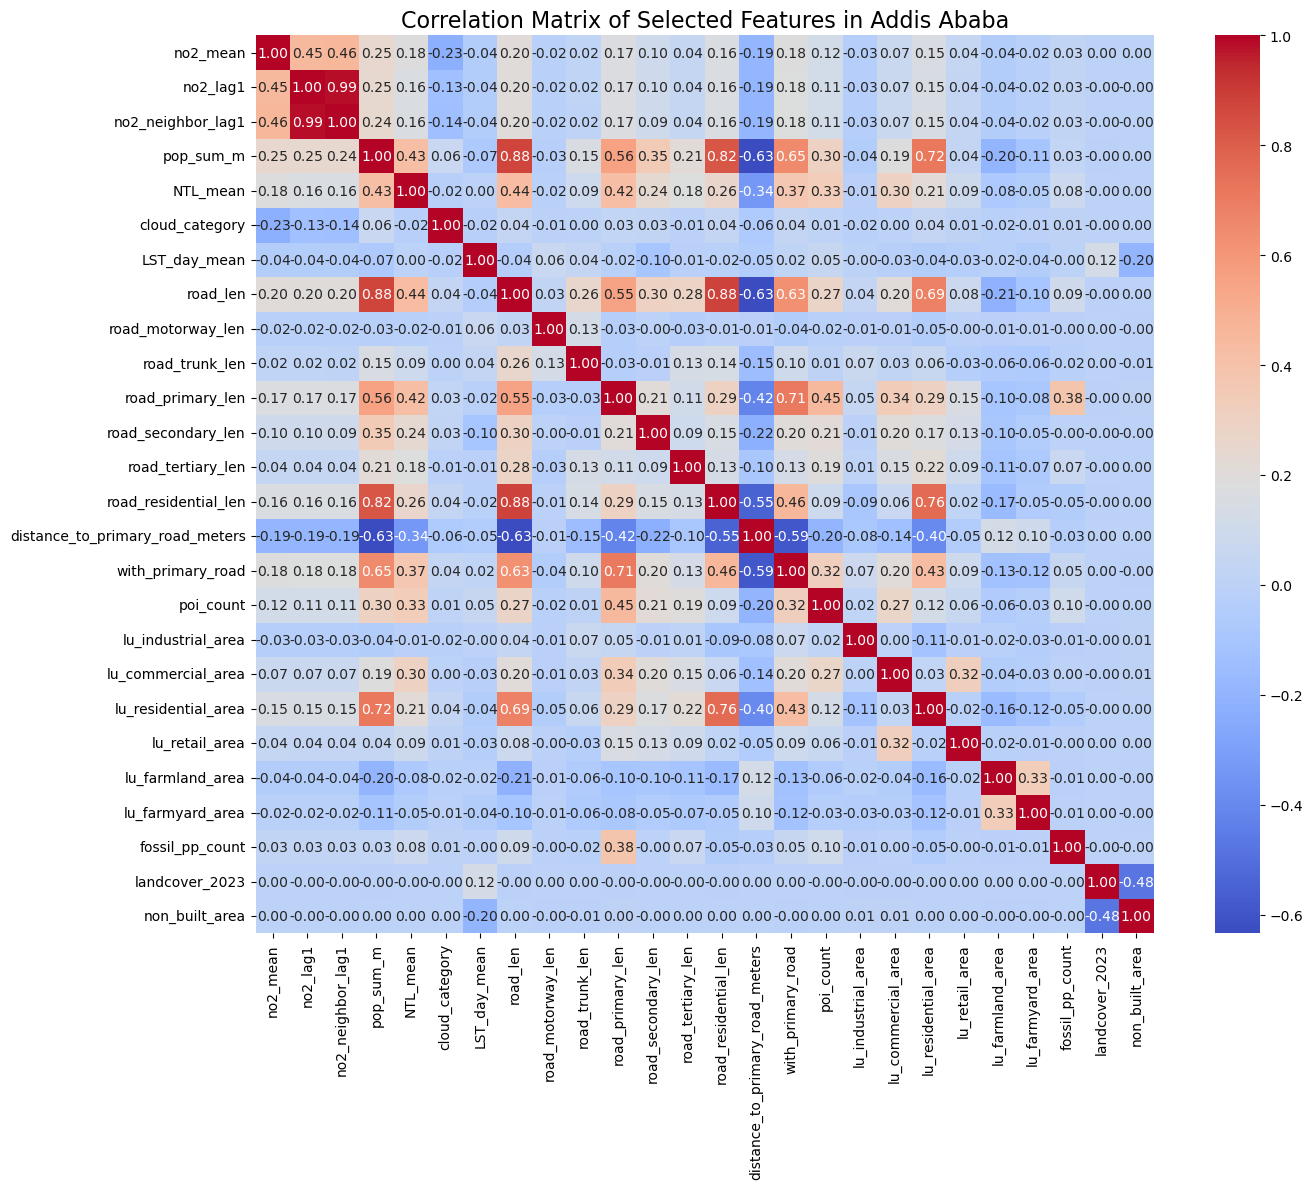

Heatmap saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data\Correlation Matrix of Selected Features in Addis Ababa.png


In [ ]:
from visualization import plot_corr_matrix
plot_corr_matrix(df_addis, cols_of_interest, output_path=output_path,  plot_name='Correlation Matrix of Selected Features in Addis Ababa')

**Baghdad**

In [ ]:
import pandas as pd

output_path = DATA_PATH / "demo-data"
df_baghdad = pd.read_parquet(DATA_PATH / 'temp' / "full_baghdad_df.parquet")

cols_of_interest = [
    'no2_mean', 
    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 

    # night time light
    'NTL_mean', 

    # mobility data
    'TCI',

    # climate data
    'cloud_category',
    'LST_day_mean',
    'temp_mean',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023',
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',

    'tree_cover_a', 
    'shrubland_a',
    # 'grassland_a', 'cropland_a', 'built_up_a', 'sparse_veg_a', 
    # 'snow_a', 'moss_a', 'unclassified_a',
    # 'water_bod_a', 'wetland_a', 'mangroves_a', 
    'non_built_area',
]


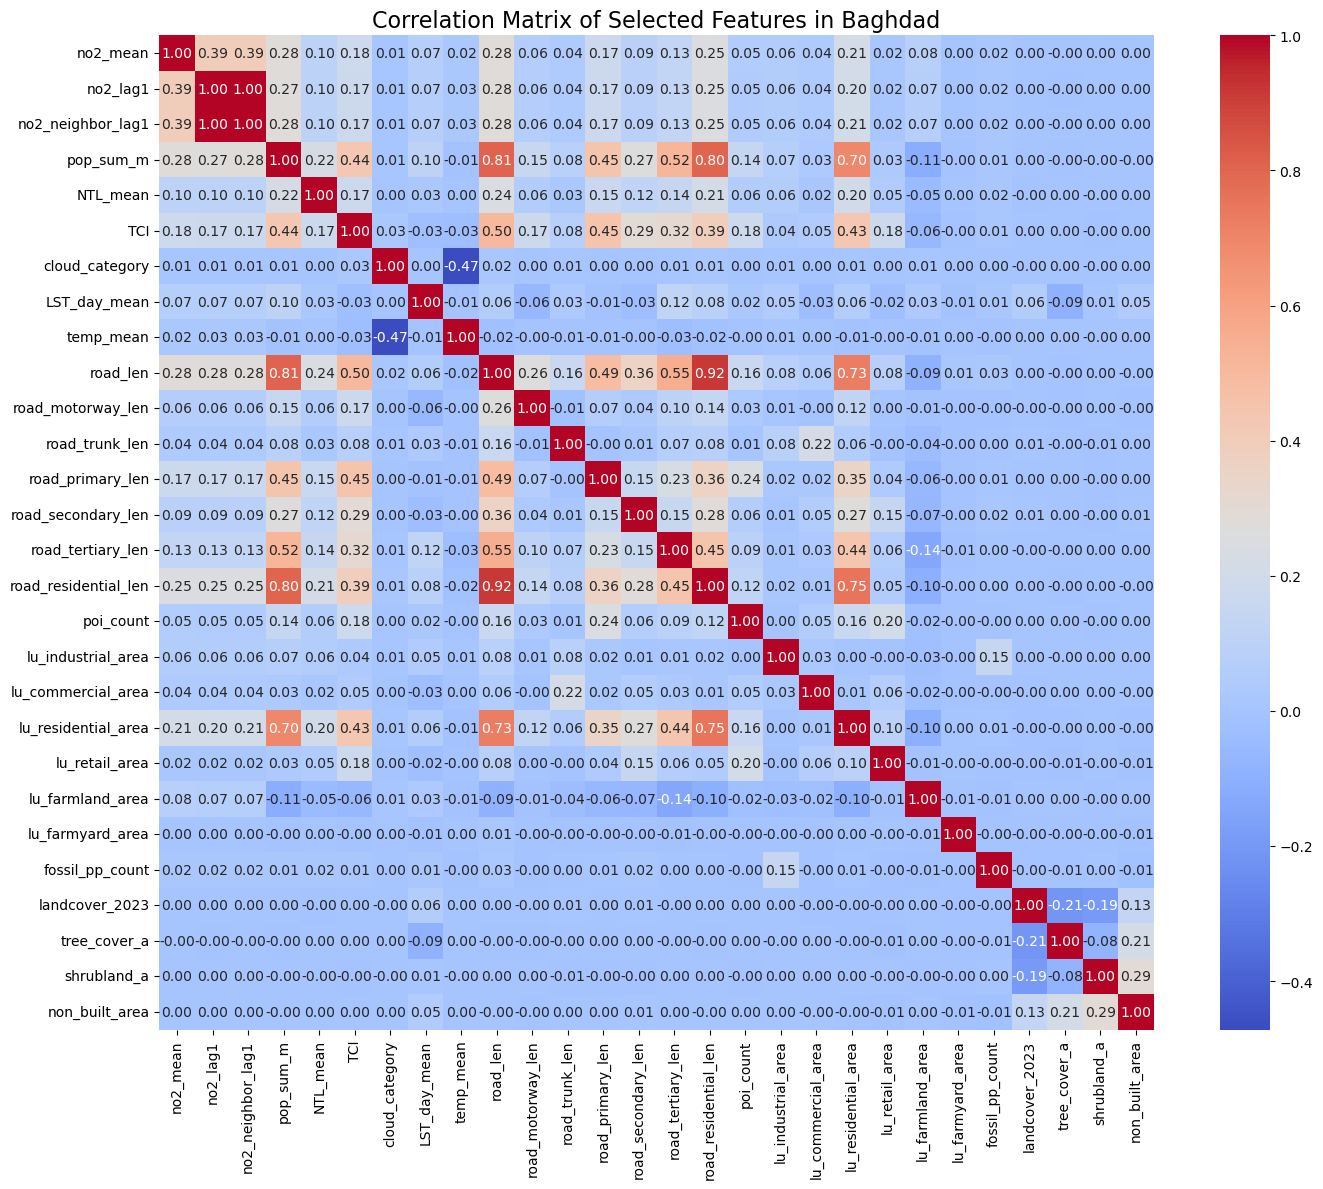

Heatmap saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data\Correlation Matrix of Selected Features in Baghdad.png


In [ ]:
from visualization import plot_corr_matrix
plot_corr_matrix(df_baghdad, cols_of_interest, output_path=output_path,  plot_name='Correlation Matrix of Selected Features in Baghdad')